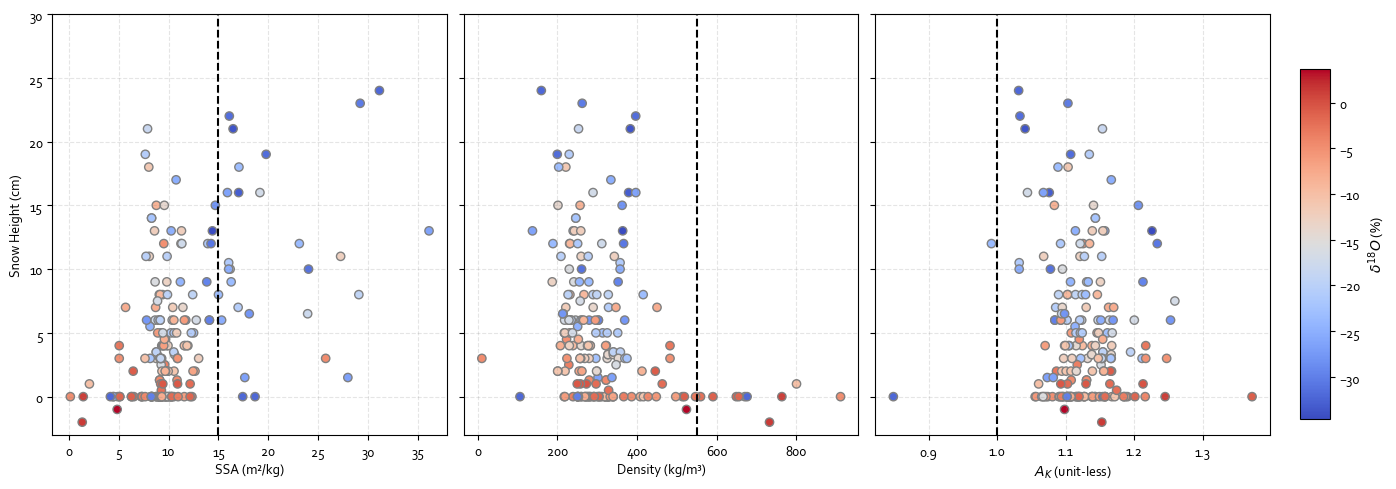

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Setting the font globally to 'Corbel'
rcParams['font.family'] = 'Corbel'

# Load the dataset
data = pd.read_excel(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\SSA Density\microCT_isotope_sample_info.xlsx')

# Set up the matplotlib figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Normalize for the colormap
norm = Normalize(data['iso_d18O'].min(), data['iso_d18O'].max())

# Titles for x-axes
x_titles = ["SSA (m\u00b2/kg)", "Density (kg/m\u00b3)", "$A_{K}$ (unit-less)"]

# Scatter plots for each of the x-axes
for i, x in enumerate(['CTssa', 'CTdens', 'CTani']):
    scatter = axes[i].scatter(data[x], data['4iso_to'], c=data['iso_d18O'], cmap='coolwarm', norm=norm, edgecolor='grey')
    axes[i].set_xlabel(x_titles[i])
    if i == 0:
        axes[i].set_ylabel('Snow Height (cm)')
    else:
        axes[i].set_ylabel('')
    axes[i].set_ylim(-3, 30)  # Setting y-axis limit

    # Add grid lines with 20% transparent grey
    axes[i].grid(True, color='grey', alpha=0.2, linestyle='--')

    # Add specific vertical lines
    if i == 0:  # SSA subplot
        axes[i].axvline(x=15, color='black', linestyle='--')
    elif i == 1:  # Density subplot
        axes[i].axvline(x=550, color='black', linestyle='--')
    elif i == 2:  # Density subplot
        axes[i].axvline(x=1.0, color='black', linestyle='--')


plt.tight_layout()

# Create a ScalarMappable for the color bar
sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Adding a unified color bar for all three subplots
# Adjust these values as needed for positioning the color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\delta^{18}O$ (%)')

# Save the figure
fig.savefig('C:/CiASOM/PhD/07.Manuscripts/#2.Snow Surface/Figures/SSA Density/Plots/scatter_plots.jpeg', dpi=600, format='jpeg')

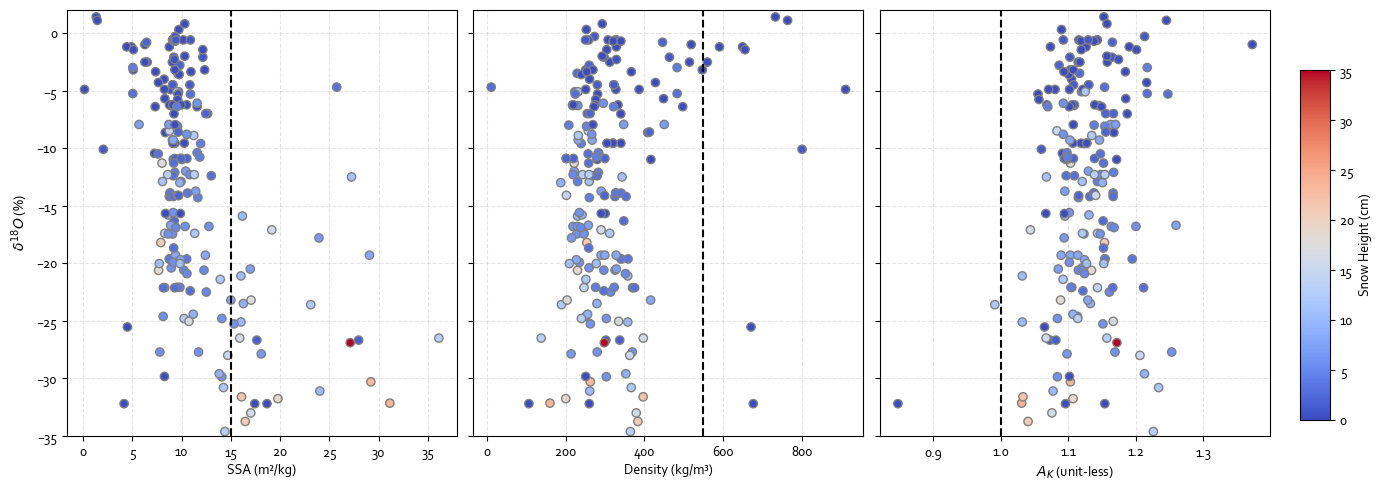

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Setting the font globally to 'Corbel'
rcParams['font.family'] = 'Corbel'

# Load the dataset
data = pd.read_excel(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\SSA Density\microCT_isotope_sample_info.xlsx')

# Set up the matplotlib figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Normalize for the colormap with limits 0 to 35
norm = Normalize(0, 35)

# Titles for x-axes
x_titles = ["SSA (m\u00b2/kg)", "Density (kg/m\u00b3)", "$A_{K}$ (unit-less)"]

# Scatter plots for each of the x-axes
for i, x in enumerate(['CTssa', 'CTdens', 'CTani']):
    scatter = axes[i].scatter(data[x], data['iso_d18O'], c=data['4iso_to'], cmap='coolwarm', norm=norm, edgecolor='grey')
    axes[i].set_xlabel(x_titles[i])
    if i == 0:
        axes[i].set_ylabel('$\\delta^{18}O$ (‰)')
    else:
        axes[i].set_ylabel('')
    axes[i].set_ylim(-35, 2)  # Setting y-axis limit

    # Add grid lines with 20% transparent grey
    axes[i].grid(True, color='grey', alpha=0.2, linestyle='--')

    # Add specific vertical lines
    if i == 0:  # SSA subplot
        axes[i].axvline(x=15, color='black', linestyle='--')
    elif i == 1:  # Density subplot
        axes[i].axvline(x=550, color='black', linestyle='--')
    elif i == 2:  # Anisotropy subplot
        axes[i].axvline(x=1.0, color='black', linestyle='--')

plt.tight_layout()

# Create a ScalarMappable for the color bar with limits 0 to 35
sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Adding a unified color bar for all three subplots
# Adjust these values as needed for positioning the color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Snow Height (cm)')

# Save the figure
fig.savefig('C:/CiASOM/PhD/07.Manuscripts/#2.Snow Surface/Figures/SSA Density/Plots/scatter_plots_2.jpeg', dpi=600, format='jpeg')

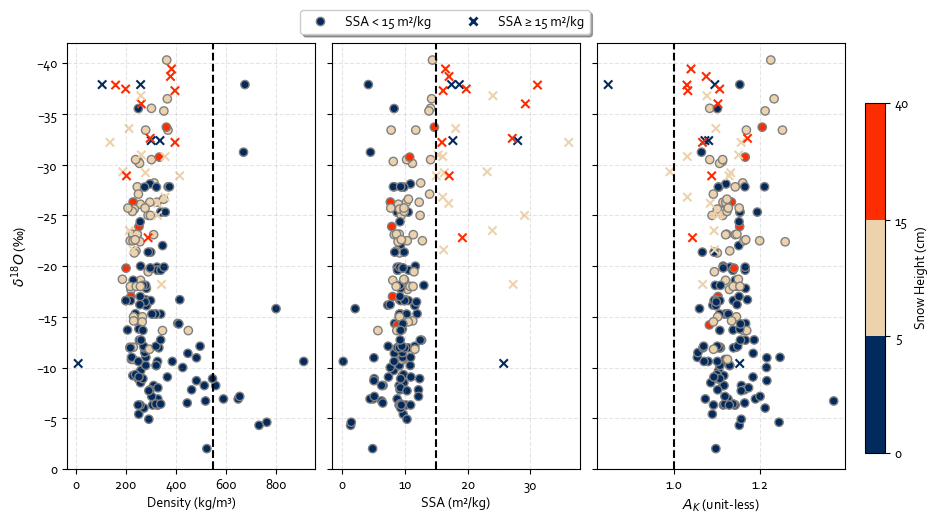

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D  # Import for custom legend

# Setting the font globally to 'Corbel'
rcParams['font.family'] = 'Corbel'

# Load the dataset
data = pd.read_excel(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\SSA Density\microCT_isotope_sample_info_corrected.xlsx')

# Set up the matplotlib figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# Define the boundaries and colors
boundaries = [0, 5, 15, 40]
colors = ['#022A5D', '#ECD3AD', '#FE2C01']
custom_cmap = ListedColormap(colors)

# Create a BoundaryNorm instance
norm = BoundaryNorm(boundaries, len(colors))

# Titles for x-axes
x_titles = ["Density (kg/m\u00b3)", "SSA (m\u00b2/kg)", "$A_{K}$ (unit-less)"]

# Define the SSA conditions for the markers
ssa_less_than_15 = data['CTssa'] < 15
ssa_greater_than_or_equal_15 = data['CTssa'] >= 15

# Scatter plots for each of the x-axes
for i, x in enumerate(['CTdens', 'CTssa', 'CTani']):
    # Scatter plot for SSA < 15 m²/kg
    axes[i].scatter(data.loc[ssa_less_than_15, x], data.loc[ssa_less_than_15, 'iso_d18O_cor'], 
                    c=data.loc[ssa_less_than_15, '4iso_to'], cmap=custom_cmap, 
                    norm=norm, edgecolor='grey', marker='o')

    # Scatter plot for SSA >= 15 m²/kg
    axes[i].scatter(data.loc[ssa_greater_than_or_equal_15, x], data.loc[ssa_greater_than_or_equal_15, 'iso_d18O_cor'], 
                    c=data.loc[ssa_greater_than_or_equal_15, '4iso_to'], cmap=custom_cmap, 
                    norm=norm, marker='x')

    axes[i].set_xlabel(x_titles[i])
    if i == 0:
        axes[i].set_ylabel('$\\delta^{18}O$ (‰)')
    else:
        axes[i].set_ylabel('')
    axes[i].set_ylim(0, -42)  # Inverting y-axis limit

    # Add grid lines with 20% transparent grey
    axes[i].grid(True, color='grey', alpha=0.2, linestyle='--')

    # Add specific vertical lines
    if i == 0:  # Density subplot
        axes[i].axvline(x=550, color='black', linestyle='--')
    elif i == 1:  # SSA subplot
        axes[i].axvline(x=15, color='black', linestyle='--')
    elif i == 2:  # Anisotropy subplot
        axes[i].axvline(x=1.0, color='black', linestyle='--')

plt.tight_layout()

# Create custom legend entries
legend_elements = [Line2D([0], [0], marker='o', color='w', label='SSA < 15 m²/kg', 
                          markerfacecolor='#022A5D', markersize=6, markeredgecolor='grey'),
                   Line2D([0], [0], marker='x', color='#022A5D', label='SSA ≥ 15 m²/kg', 
                          markerfacecolor='#022A5D', markersize=6, markeredgewidth=2, linestyle='None')]

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.45, 1.05),
           ncol=2, fancybox=True, shadow=True)

# Create a ScalarMappable for the color bar with the new boundaries and colors
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

# Adding a unified color bar for all three subplots
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax, boundaries=boundaries)
cbar.set_label('Snow Height (cm)')

# Save the figure
fig.savefig('C:/CiASOM/PhD/07.Manuscripts/#2.Snow Surface/Figures/SSA Density/Plots/scatter_plots_2.jpeg', dpi=600, format='jpeg', bbox_inches='tight')

# Show plot
plt.show()

In [5]:
import pandas as pd

# File path
file_path = "C:/CiASOM/PhD/07.Manuscripts/#2.Snow Surface/Data/CiASOM_SLF_Corrected.xlsx"

# Identifiers to filter
identifiers = [
    "PS122-1_10-5", "PS122-2_19-144", "PS122-2_19-92", "PS122-2_20-80",
    "PS122-2_21-14", "PS122-2_21-15", "PS122-2_21-52", "PS122-2_21-53",
    "PS122-2_21-96", "PS122-2_22-5", "PS122-2_22-6", "PS122-2_22-73",
    "PS122-2_23-2", "PS122-2_23-34", "PS122-2_23-74", "PS122-2_23-9",
    "PS122-2_24-14", "PS122-2_24-15", "PS122-2_24-35", "PS122-2_24-86",
    "PS122-2_25-22", "PS122-2_25-23", "PS122-2_25-80", "PS122-2_25-81",
    "PS122-3_29-28", "PS122-3_29-29", "PS122-3_29-43", "PS122-3_29-9",
    "PS122-3_32-22", "PS122-3_32-59", "PS122-3_33-41", "PS122-3_35-23",
    "PS122-3_35-53", "PS122-3_36-103", "PS122-3_36-35", "PS122-3_37-129",
    "PS122-3_37-132", "PS122-3_37-41", "PS122-3_37-57", "PS122-3_37-68",
    "PS122-3_38-1", "PS122-3_38-141", "PS122-3_38-95", "PS122-3_39-46",
    "PS122-3_39-88", "PS122-3_39-91", "PS122-3_39-92"
]

# Read the Excel file
df = pd.read_excel(file_path, sheet_name='All')

# Filter rows with specific identifiers
filtered_df = df[df['PS Operation Device/Lable on Bottle'].isin(identifiers)]

# Saving the filtered rows into a new file
output_path = "C:/CiASOM/PhD/07.Manuscripts/#2.Snow Surface/Data/CiASOM_SLF_Corrected_Physical.xlsx"
filtered_df.to_excel(output_path, index=False)